In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error,mean_squared_error,explained_variance_score,r2_score

In [2]:
xt = []
i = 8
xo = 0
for i in range (i):
    xt.append(
        xo+i
    )
print (xt)
x_t = np.array([xt])
x_transpose = x_t.transpose()
print (x_transpose)
x_transpose.shape
x = x_transpose.reshape(len(x_transpose), 1)
x



[0, 1, 2, 3, 4, 5, 6, 7]
[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]]


array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7]])

In [3]:
xt
y =[]
for x in xt:
    y.append(
        2*x + 4
    )
print (y)
y_t = np.array([y])
y = y_t.reshape(len(x_transpose),1)
y

[4, 6, 8, 10, 12, 14, 16, 18]


array([[ 4],
       [ 6],
       [ 8],
       [10],
       [12],
       [14],
       [16],
       [18]])

In [35]:
FLT_1 = pd.read_excel('FLT 1 Revised.xlsx')
a = FLT_1.drop(columns='t(s)')
a

,aoa (deg),pitch (deg),pitch speed (deg/s),true speed (m/s),Cd,Cl,Cm
0,1.978644,1.994105,0.009835,50.741865,0.050988,0.460989,0.001941
1,1.978343,1.994686,0.009787,50.742590,0.050972,0.461021,0.001953
2,1.978041,1.995267,0.009738,50.743315,0.050956,0.461052,0.001966
3,1.977740,1.995847,0.009690,50.744040,0.050941,0.461083,0.001978
4,1.977439,1.996428,0.009642,50.744765,0.050925,0.461115,0.001990
...,...,...,...,...,...,...,...
99995,2.391689,2.924688,-0.012253,50.285324,0.043411,0.416994,-0.004519
99996,2.391753,2.924688,-0.012253,50.285324,0.043395,0.416750,-0.004529
99997,2.391817,2.924688,-0.012253,50.285324,0.043379,0.416508,-0.004539
99998,2.391882,2.924688,-0.012253,50.285324,0.043364,0.416266,-0.004549


In [36]:
data = a['Cl']
data

0        0.460989
1        0.461021
2        0.461052
3        0.461083
4        0.461115
           ...   
99995    0.416994
99996    0.416750
99997    0.416508
99998    0.416266
99999    0.416024
Name: Cl, Length: 100000, dtype: float64

In [37]:
len(data)

100000

In [38]:
x = data[0:(len(data)-1)].to_numpy()
y = data[1:len(data)].to_numpy()


In [39]:
x.shape

(99999,)

In [40]:
y.shape


(99999,)

In [41]:
x

array([0.46098922, 0.46102062, 0.46105202, ..., 0.41675045, 0.41650778,
       0.41626551])

In [42]:
y

array([0.46102062, 0.46105202, 0.46108342, ..., 0.41650778, 0.41626551,
       0.41602363])

In [12]:
np.squeeze(np.squeeze(x))

array([50.74186482, 50.74258986, 50.7433149 , ..., 50.28532398,
       50.28532393, 50.28532389])

In [13]:
FLT_1[0:len(FLT_1)-1]

,t(s),aoa (deg),pitch (deg),pitch speed (deg/s),true speed (m/s),Cd,Cl,Cm
0,0.00000,1.978644,1.994105,0.009835,50.741865,0.050988,0.460989,0.001941
1,0.00012,1.978343,1.994686,0.009787,50.742590,0.050972,0.461021,0.001953
2,0.00024,1.978041,1.995267,0.009738,50.743315,0.050956,0.461052,0.001966
3,0.00036,1.977740,1.995847,0.009690,50.744040,0.050941,0.461083,0.001978
4,0.00048,1.977439,1.996428,0.009642,50.744765,0.050925,0.461115,0.001990
...,...,...,...,...,...,...,...,...
99994,11.99928,2.391625,2.924688,-0.012253,50.285324,0.043427,0.417237,-0.004509
99995,11.99940,2.391689,2.924688,-0.012253,50.285324,0.043411,0.416994,-0.004519
99996,11.99952,2.391753,2.924688,-0.012253,50.285324,0.043395,0.416750,-0.004529
99997,11.99964,2.391817,2.924688,-0.012253,50.285324,0.043379,0.416508,-0.004539


In [43]:

# x = x_transpose
# y = y
initializers = keras.initializers.GlorotNormal()
model = keras.Sequential([
    keras.layers.Dense(1 , input_shape= (1,)),
    keras.layers.Dense(2 ,activation = "sigmoid"),
    keras.layers.Dense(1 ,activation = "linear",),
])
optimizer = keras.optimizers.SGD(learning_rate=0.3, momentum = 0.2)
model.compile (optimizer=optimizer,
               loss = 'MSE',
               metrics = ['Accuracy']
               )

history = model.fit(x, y, epochs = 1000, batch_size=100)
model.summary()




Epoch 1/1000
1000/1000 [==============================] - 2s 1ms/step - loss: 0.0048 - Accuracy: 0.0000e+00
Epoch 2/1000
1000/1000 [==============================] - 1s 1ms/step - loss: 1.9095e-05 - Accuracy: 0.0000e+00
Epoch 3/1000
1000/1000 [==============================] - 1s 1ms/step - loss: 1.1157e-07 - Accuracy: 0.0000e+00
Epoch 4/1000
1000/1000 [==============================] - 1s 1ms/step - loss: 1.0813e-07 - Accuracy: 0.0000e+00
Epoch 5/1000
1000/1000 [==============================] - 1s 1ms/step - loss: 1.0515e-07 - Accuracy: 0.0000e+00
Epoch 6/1000
1000/1000 [==============================] - 1s 1ms/step - loss: 1.0232e-07 - Accuracy: 0.0000e+00
Epoch 7/1000
1000/1000 [==============================] - 1s 1ms/step - loss: 9.9815e-08 - Accuracy: 0.0000e+00
Epoch 8/1000
1000/1000 [==============================] - 1s 1ms/step - loss: 9.7222e-08 - Accuracy: 0.0000e+00
Epoch 9/1000
1000/1000 [==============================] - 1s 1ms/step - loss: 9.4881e-08 - Accuracy: 0.0000e

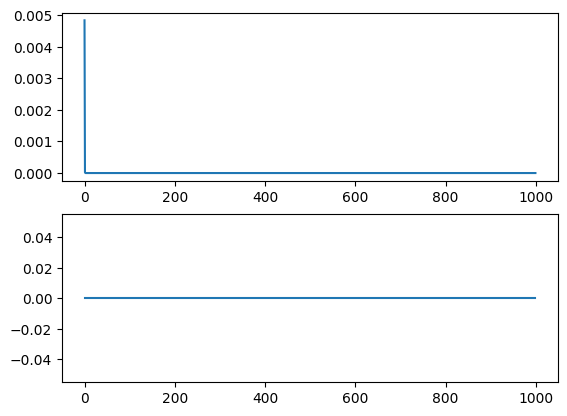

In [44]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'])
ax[1].plot(history.history['Accuracy'])

In [46]:
y_pred = model.predict(x)

3125/3125 [==============================] - 4s 1ms/step


In [47]:
y_pred

array([[0.46097493],
       [0.46100664],
       [0.46103823],
       ...,
       [0.4164884 ],
       [0.41624475],
       [0.41600132]], dtype=float32)

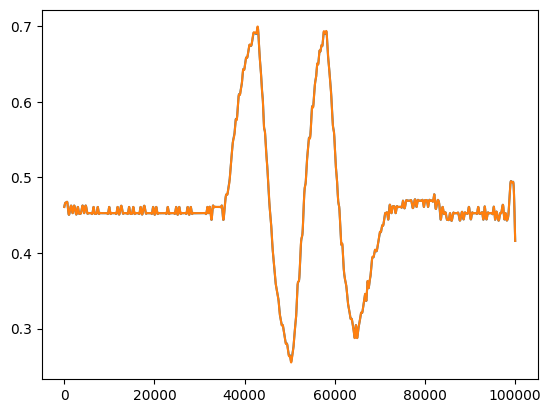

In [51]:
plt.plot (y_pred)



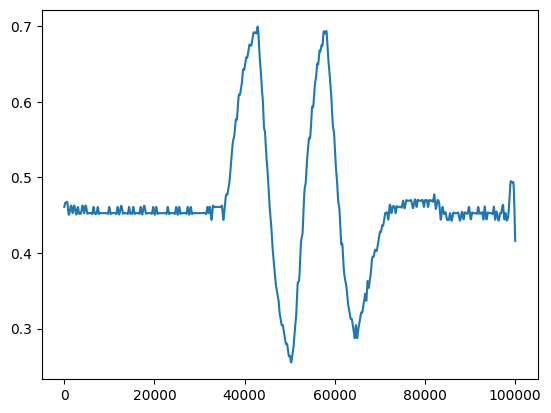

In [52]:
plt.plot (data)

In [32]:
print('R-square:',r2_score(data[:len(data)-1], y_pred))

ValueError: Found input variables with inconsistent numbers of samples: [49, 99999]

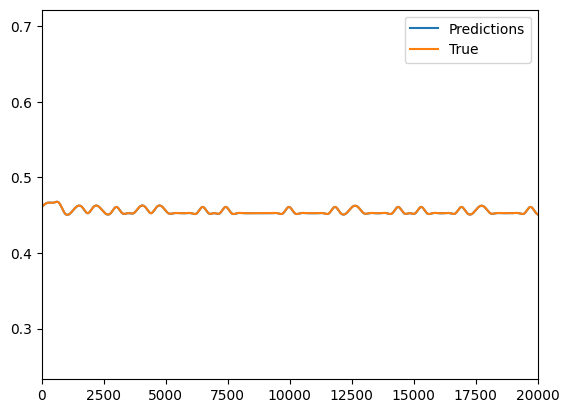

In [49]:

plt.plot (y_pred, label='Predictions')
plt.plot (data, label="True")
plt.xlim(0, 20000)
plt.legend()

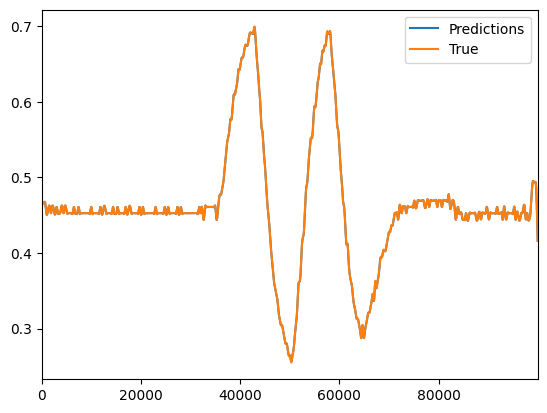

In [50]:
N_data = len(y_pred)
plt.plot (y_pred, label='Predictions')
plt.plot (data, label="True")
plt.xlim(0, N_data)
plt.legend()

In [20]:
Cd2 = y_pred[:, 4]
Cd2

IndexError: index 4 is out of bounds for axis 1 with size 1

In [ ]:
plt.figure()
plt.plot (FLT_1['Cd'])
plt.plot (Cd2)
